In [1]:
from numpy import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import tools

import datetime
import socket
print("Generated on %s on %s" % (datetime.date.today(), socket.gethostname()))

Generated on 2018-02-13 on eu-login-02


# Kelvin-Helmholtz

We run the Kelvin-Helmholtz instability for different resolutions

core_counts['multix'] = [1, 4, 16, 64, 256, 1024]
runtimes['multix'] = [172000, 362000, 1064000, 3263000, 8609000, 23972000]
runtimes_per_timestep['multix'] = [32.21577074358494, 32.14063748557223, 45.905600138061956, 67.72238595326056, 86.55566950192033, 117.30050302401597]

core_counts['multiy'] = [1, 4, 16, 64, 256, 1024]
runtimes['multiy'] = [174000, 362000, 882000, 2111000, 4745000, 11828000]
runtimes_per_timestep['multiy'] = [32.59037272897547, 32.14063748557223, 38.053326430235565, 43.81304221493504, 47.706661840702985, 57.8771212150868]

Failed at resolution 2048 with multixmultiy

 Skipping.
[Errno 2] No such file or directory: '../runs/multixmultiy/2d/weak_scaling/kelvinhelmholtz_2048/alsuqcli_kh_2048_report.json'
Failed at resolution 4096 with multixmultiy

 Skipping.
[Errno 2] No such file or directory: '../runs/multixmultiy/2d/weak_scaling/kelvinhelmholtz_4096/alsuqcli_kh_4096_report.json'
Failed at resolution 8192 with multixmultiy

 Skipping.
[Errno 2] No such file or di

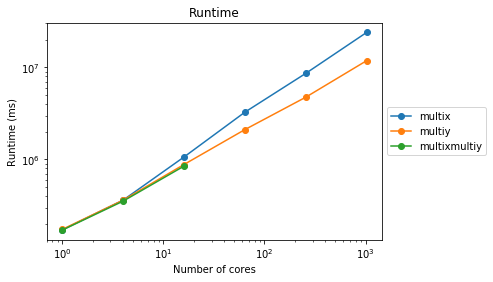

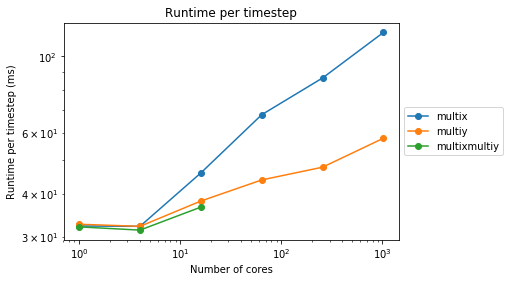

revisions= ['29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f']

build_types: ['Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release']


In [2]:
setups=['multix', 'multiy', 'multixmultiy']
build_types = []
revisions = []
for setup in setups:
    basename = '../runs/{setup}/2d/weak_scaling/kelvinhelmholtz_{N}/alsuqcli_kh_{N}_report.json'
    
    resolutions = [256, 512, 1024, 2048, 4096, 8192]
    runtimes = []
    runtimes_per_timestep = []
    core_counts = []
    for resolution in resolutions:
        try:
            report = basename.format(N=resolution, setup = setup)
            
            git_revision = tools.get_revision(report)
            revisions.append(git_revision)
            build_types.append(tools.get_build_type(report))
            runtime = tools.get_runtime(report)
            runtimes.append(runtime)
            
            cores = tools.get_total_cores(report)
            core_counts.append(cores)
            
            timesteps = tools.get_timesteps(report)
            runtimes_per_timestep.append(float(runtime)/timesteps)
        except Exception as e:
            print("Failed at resolution {N} with {setup}\n\n Skipping.".format(N=resolution, setup=setup))
            print(e)
            
    try:
        plt.figure(0)
        plt.title("Runtime")
        plt.loglog(core_counts, runtimes, '-o',label=setup)
        plt.xlabel('Number of cores')
        plt.ylabel('Runtime (ms)')
        ax = plt.gca()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
        
        plt.figure(1)
        plt.title("Runtime per timestep")
        plt.loglog(core_counts, runtimes_per_timestep, '-o',label=setup)
        plt.xlabel('Number of cores')
        plt.ylabel('Runtime per timestep (ms)')
        
        ax = plt.gca()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    except Exception as e:
        print("Failed at {setup}\n\n Skipping.".format(setup=setup))
        print(e)
    
    print("core_counts['%s'] = %s" % (setup, core_counts))
    print("runtimes['%s'] = %s" % (setup, runtimes))
    print("runtimes_per_timestep['%s'] = %s" % (setup, runtimes_per_timestep))
    print("")
print("Git revision: %s" % git_revision )
plt.show()
print("revisions= %s" % revisions)
print()
print("build_types: %s" % build_types)

In [3]:
import os
cmakeCache = '../alsvinn/build/CMakeCache.txt'
if os.path.exists(cmakeCache):
    with open(cmakeCache, 'r') as f:
        print(f.read())

# This is the CMakeCache file.
# For build in directory: /cluster/scratch/klye/alsvinn_scalings_beta/alsvinn/build
# It was generated by CMake: /cluster/home/klye/local_cmake/bin/cmake
# You can edit this file to change values found and used by cmake.
# If you do not want to change any of the values, simply exit the editor.
# If you do want to change a value, simply edit, save, and exit the editor.
# The syntax for the file is as follows:
# KEY:TYPE=VALUE
# KEY is the name of a variable in the cache.
# TYPE is a hint to GUIs for the type of VALUE, DO NOT EDIT TYPE!.
# VALUE is the current value for the KEY.

########################
# EXTERNAL cache entries
########################

//Build doxygen documentation
ALSVINN_BUILD_DOXYGEN:BOOL=OFF

//Build unittests (requires Gtest). HIGHLY recommended!
ALSVINN_BUILD_TESTS:BOOL=OFF

//CXX flags to use
ALSVINN_CXX_FLAGS:STRING=

//Use NVidia's GPU direct to do MPI transfers (this is faster,
// but not only available)
ALSVINN_MPI_GPU_DIRECT:B